![dance party](dance_party.jpg)

# Background

It's that time of the year when summer has come, and it brings a feeling of happiness and liveliness, especially if you're in the Northern Hemisphere. Our company has decided to throw a dance party to celebrate this cheerful season.

# Objective

We've been given a special task because we have a unique mix of creativity and the ability to use our data skills. Our job is to make a playlist for our dance party that makes everyone want to dance and have a great time.

# Introduction

This report is like a journey where we try to find the answer to a question: How can we choose songs that make people want to dance and have fun at our party? We'll use our data skills and sense of what sounds good to do this. We'll show you the steps we took, the things we learned from the data, and how we used both creativity and science to make a playlist that will make our party unforgettable. So, let's start this journey into the world of music, numbers, and good times!

# Data Description
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [1]:
# Installing Some External Libraries and Importing Necessary Libraries

% pip install phik --quiet
% pip install spacy --quiet
% pip install mlxtend --quiet
print("Installed")

import os
import json
import math
import phik
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Installed


In [2]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Preprocessing

Our dataset comprises a total of `113,027` entries, each representing a unique music track. These entries are organized into 20 columns, each containing specific information about the tracks.

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

This dataset provides a rich array of information about various musical attributes, and we will leverage this data to curate a dance-themed playlist that resonates with the energy and spirit of our summer party. Before we proceed with playlist curation, we will perform necessary data preprocessing steps to ensure the dataset is ready for analysis and selection.

## Handling Missing Values

Upon examining the dataset, we identified that there are a few missing values in specific columns: `artists`, `album_name`, and `track_name`.

In [4]:
spotify.isnull().sum()[spotify.isnull().sum()>0]

artists       1
album_name    1
track_name    1
dtype: int64

Given the small number of missing values (only three in total) and to maintain data consistency, we decided that the best course of action is to remove the records containing these missing values. This approach ensures that the dataset remains complete and aligned with the overall structure, making it suitable for further analysis and playlist curation.

In [3]:
# Rows where 'artists', 'album_name', or 'track_name' is null
index_to_drop = (spotify.loc[spotify['artists'].isnull() | 
                             spotify['album_name'].isnull() | 
                             spotify['track_name'].isnull()]).index

# Remove the identified rows with null values and reset the index
spotify = spotify.drop(index_to_drop).reset_index(drop=True)

# This is a double-check to ensure all rows with null values are removed
spotify.loc[spotify['artists'].isnull() | spotify['album_name'].isnull() | spotify['track_name'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


## Handling Duplicate Records

During our examination of the dataset, it came to our attention that there were instances of duplicate records. Specifically, we identified a total of `444 records` that were exact duplicates of one another. These duplicates arose due to factors such as multiple appearances of the same track in different playlists or catalog entries.

In [4]:
spotify[spotify.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1911,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346.0,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2141,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666.0,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3723,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621.0,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4599,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714.0,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5708,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080.0,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110287,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826.0,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
110402,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152.0,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111017,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773.0,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112001,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933.0,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


To ensure the integrity and accuracy of our data analysis, we have chosen to address this issue by removing the duplicate records. This action eliminates redundancy and streamlines our dataset to contain only unique entries, thus preventing any potential skewing of our analysis or playlist curation process.

In [5]:
#dropping duplicated records
spotify.drop_duplicates(inplace=True)

#ensuring all duplicates are removed
spotify[spotify.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Before moving ahead, there are fields like `artist names` can pose challenges in finding duplicated records, as their names may appear in different orders across records. To ensure accurate analysis, it's essential to **standardize the artist names** within each record.

Consider the following scenario:

| Record | Artist            | Song        |
| ------ | ----------------- | ----------- |
| 1      | Aaron; Paul       | HelloWorld  |
| 2      | Paul; Aaron       | HelloWorld  |

Although both records represent the same song, they are treated as distinct entries due to the inconsistent order of artist names. To effectively identify and manage duplicate records, we must standardize the artist names by ordering them consistently.

By standardizing the artist names, the program can recognize these as duplicate records:

| Record | Artist            | Song        |
| ------ | ----------------- | ----------- |
| 1      | Aaron; Paul       | HelloWorld  |
| 2      | Aaron; Paul       | HelloWorld  |

This enables us to confidently remove duplicates from the dataset, ensuring data integrity and accurate analysis.

In [8]:
def orderDelimeterText(text,delimeter):
    # space remove
    text = " ".join(text.split())

    # Convert Text to List
    array = text.split(';')
    
    # strip removing start-end whitespaces from a string
    array = list ( map(str.strip, array) )
    
    # Sort elements
    array.sort()
    
    # Convert Back to String
    return ";".join(array)

ordered_artists = spotify['artists'].apply(orderDelimeterText, args=(";",))
spotify['artists'] = ordered_artists

print("Number of Duplicated Records are:",spotify[spotify.duplicated()].size)
spotify = spotify.drop_duplicates()
spotify = spotify.reset_index(drop=True)
print("Duplicated Records after deleting:", spotify.duplicated().sum())

Number of Duplicated Records are: 0
Duplicated Records after deleting: 0


We also observed that for the same `track_id`. There can be multiple entries of **same song with different genres** assigned to them. 

**Example** 

| track id |   Artist   | Song |     Genre     |
|:--------:|:----------:|:----:|:-------------:|
|     1    | Jack; Ryan |  ABC |      rock     | 
|     1    | Jack; Ryan |  ABC |      punk     |

It is important to note that some songs may belong to multiple genres, and removing these duplicate entries could result in the loss of valuable genre information. 

As such, we have **decided not to delete duplicates in cases where the track ID remains the same**, preserving the diversity of genre associations for each song.

In our data exploration, we also found that utilizing a composite key comprised of the attributes `artists`, `track_name`, and `track_genre` proved effective in identifying and addressing duplicate records. While these tracks might share similar names and artists, they often appeared across multiple albums, introducing redundancy to the dataset.

In [67]:
same_track = spotify[['track_name','artists', 'track_genre']].value_counts()
mask = spotify[['track_name','artists', 'track_genre']].value_counts() > 1
print('Duplicated Records by track_name, artists, track_genre:', same_track[mask].size)

Duplicated Records by track_name, artists, track_genre: 6766


To tackle this issue, we chose a **deduplication approach**, systematically removing duplicate entries while retaining a single, best representative record within each duplicate group. Our objectives with this approach are to maintain data consistency, reduce redundancy, and preserve valuable genre information associated with tracks appearing in multiple albums.

**Euclidean distance-based record deduplication**

**Overview**

In our deduplication process, our main goal is to find the **best single record** within a group of duplicate entries. We do this by comparing the attributes of each record to the **highest values** found in that same group. This helps us pick the record that comes **closest to the ideal attribute values**, making it the most representative choice for that specific group of duplicates.

**Methodology:**

Features: `ID, Artist, Song, Genre, popularity, danceability, energy, tempo`

On the basis of features **Artist, Song and, Genre** duplicated rows are identified and retained. However, when considering features popularity, danceability, energy and tempo, we select a single representative record to avoid duplicates. 

| ID | Artist | Song | Genre | popularity | danceability | energy | tempo |
|:--:|:------:|:----:|:-----:|:----------:|:------------:|:------:|-------|
| 1  |   A    | B    | rock  |     10     |      0.5     |   0.3  | 4     |
| 2  |   A    | B    | rock  |     30     |      0.2     |   0.2  | 3     |
| 3  |   A    | B    | rock  |     70     |      0.8     |   0.1  | 3     |


**Step 1: Define the Maximum Point (Max)**

- Which consists of the maximum values for each relevant attribute.
- $ Max = max_{popularity}, max_{danceability}, max_{energy}, max_{tempo} = (70,0.8,0.3,4) $

**Step 2: Calculate Euclidean Distance for Each Record**

- For each duplicate record, calculate the Euclidean distance between the record's attribute values and the maximum point Max. 

$$ Distance_{Record}= \sqrt( \sum_{i=1}^{N=columns} (Max_i - Record_{i} )^2 ) $$
where columns = relevant attributes

**Step 3: Select the Representative Record**

- Choose the record with the smallest Euclidean distance as the representative record for that group of duplicate tracks. The record that is closest to the maximum point Max is selected.
- $ Selected = Distance_{Record} < OthersDistance $

**Step 4: Repeat for All Groups of Duplicates**

- Iterated through all groups of duplicate tracks based on the specified attributes and apply the same process to select representative records for each group.

In [68]:
# Return Duplicated Tracks From a Group
def selectOneTrackFromDuplicated(data, attributes):
    
    # Create Max Point
    # Calculate the maximum values for each attribute
    max_point = data[attributes].max()
    
    # Calculate Distance from Record To Max Point
    # Calculate the Euclidean distances
    euclidean_distances = np.sqrt(((data[attributes] - max_point) ** 2).sum(axis=1))
    
    # Find the index of the record with the minimum distance
    min_distance_idx = euclidean_distances.idxmin()

    # Every Record Having Not The Minimum Distance
    dropping_idx = data.index[data.index != min_distance_idx].tolist()
    
    # Return Index of Those Which Needed To Be Drop
    return dropping_idx


# Return Duplicated Tracks From All Groups
def getDroppingIdx(data, attributes, base_attr):

    dropping_idx = []
    
    # Identify clusters with the same attribute values 
    # (e.g., 'track_name', 'artists', 'track_genre')
    clusters = data.groupby(attributes).filter(lambda group: len(group) > 1)
    
    # Iterate through each cluster of duplicate records
    for _, cluster in clusters.groupby(attributes):
        # Apply selectOneTrackFromDuplicated to each cluster to select the record to be dropped
        dropping_idx.extend(selectOneTrackFromDuplicated(data=cluster, attributes=base_attr))

    return dropping_idx

In [11]:
#The following flags indicate whether certain processes need to be run again. If False, it means that the process has already been handled by either saving it as a file or taking an output screenshot. Therefore, there is no need to go through these processes again and again.

PROCESSED_DATA_SAVE = False
ML_TRAINING = False
ML_HYPERPARAMETER_TUNING = False
FEATURE_IMPORANCE = False

In [69]:
# Calculating duplicated tracks indexes
dropping_idx = getDroppingIdx(data=spotify, 
                                attributes=['track_name','artists', 'track_genre'], 
                                base_attr=["popularity", "danceability", "energy", "tempo"])
    
# Dropping duplicated tracks
spotify = spotify.drop(dropping_idx).reset_index(drop=True)

# Ensuring all the duplicated are dropped
same_track = spotify[['track_name','artists', 'track_genre']].value_counts()
mask = spotify[['track_name','artists', 'track_genre']].value_counts() > 1
print('Duplicated Records by track_name, artists, track_genre:', same_track[mask].size)

Duplicated Records by track_name, artists, track_genre: 0


This strategy ensures that our curated dance-themed playlist is comprehensive, free from replication-related inconsistencies, and rich in diverse genre representation.

In [70]:
"Records",spotify.shape[0]

('Records', 99312)

After handling of missing values and the removal of duplicate records, we have successfully refined our dataset. As a result, we now possess a dataset that comprises a total of **99,312 unique entries**. These entries represent distinct music tracks, each contributing to the rich tapestry of our dataset. This streamlined dataset is now well-prepared and primed for the subsequent stages of our analysis and the essential task of crafting the perfect dance-themed playlist for our upcoming summer party.

# Exploratory Data Analysis

## Exploring Variable Relationships: Spearman Correlation Heatmap

In our exploratory journey into the dataset, we employed a valuable analytical tool, the Spearman correlation heatmap. This heatmap unveiled insights into the relationships between various musical attributes, shedding light on how they interact within the context of our dataset.

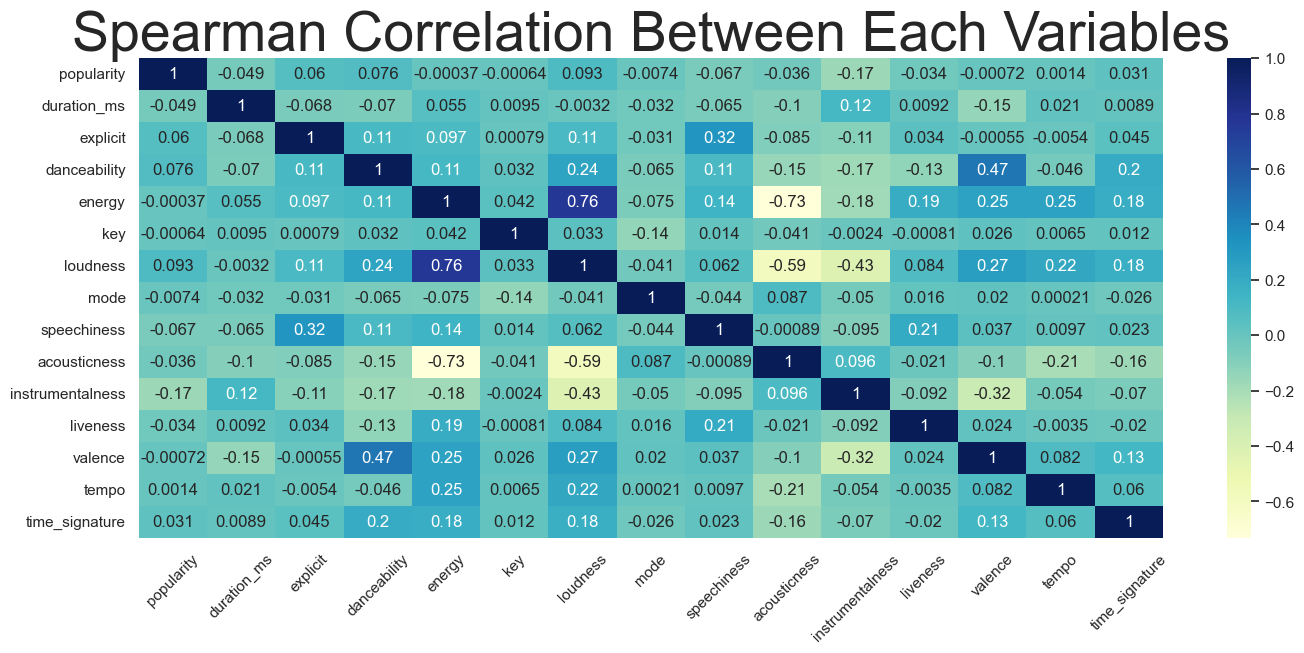

In [14]:
attr = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

sns.set_theme()

# Spearman’s ρ 
x = spotify[attr].corr()
fig = plt.figure(figsize =(16, 6)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(x, cmap='YlGnBu', annot=True, ax=ax)
plt.xticks(rotation = 45)
plt.title('Spearman Correlation Between Each Variables', fontsize = 40)
plt.show()

Notable findings include a strong positive correlation **_0.76_** between `loudness` and `energy`, indicating louder tracks are often more energetic. A positive correlation **_0.47_** between `valence` and `danceability` suggests cheerful tracks are dance-friendly. `Speechiness` and `explicit` exhibit a positive correlation **_0.32_**, indicating explicit tracks tend to have more spoken content. Additionally, `valence` and `loudness` show a positive correlation **_0.27_**, implying happier tracks may be louder. These insights inform our playlist curation, ensuring an enjoyable and harmonious selection for our summer party celebration.

## Exploring Variable Relationships: Phik Correlation Heatmap

In our data exploration, we utilized the Phik correlation analysis to delve into the relationships between musical attributes. Notably, the Phik analysis unveiled distinctive insights into these connections. For instance, it revealed a particularly robust positive correlation of **_0.80_** between `loudness` and `energy`, emphasizing that louder tracks often correspond to higher energy levels, aligning with our objective of curating an energetic playlist. Similarly, it showcased a significant correlation of **_0.74_** between `acousticness` and `energy`, indicating that tracks with lower acoustic qualities tend to possess greater energy, a valuable finding for our upbeat playlist. Additionally, it highlighted correlations such as **_0.62_** between `acousticness` and `loudness`, which underscores the connection between acoustic qualities and volume in music.

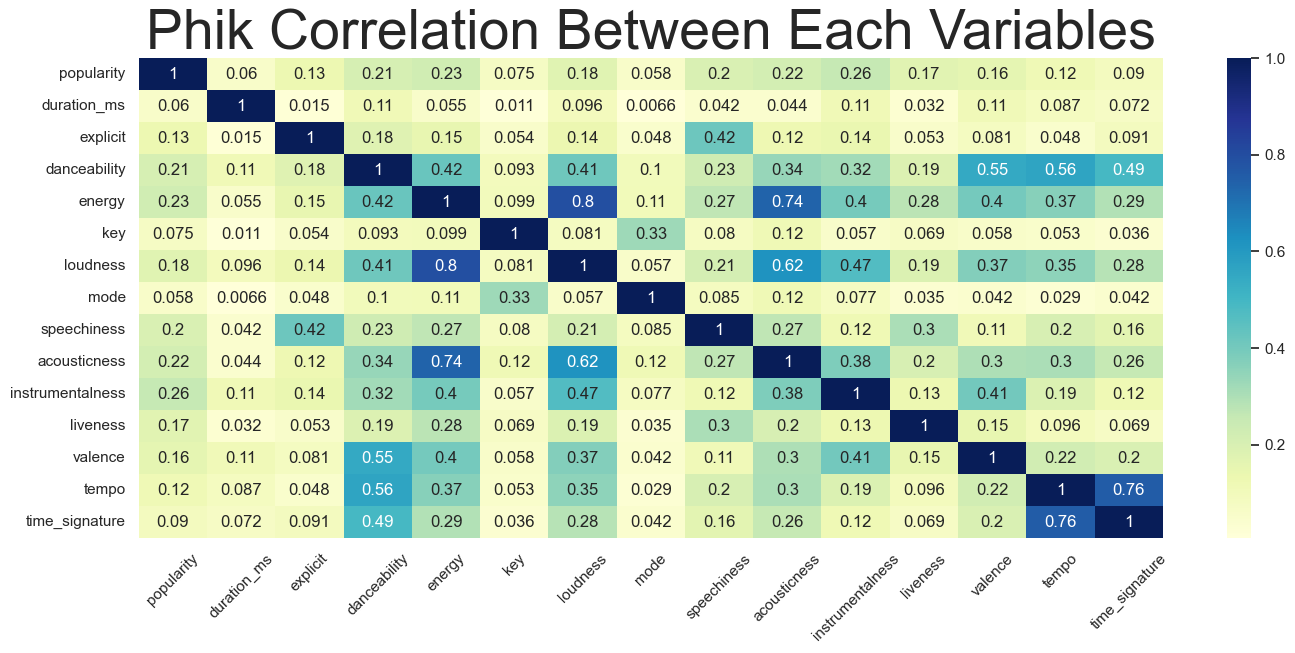

In [15]:
# Phik (𝜙k)
x = spotify[attr].phik_matrix(interval_cols=attr)
fig = plt.figure(figsize =(16, 6)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(x, cmap='YlGnBu', annot=True, ax=ax)
plt.xticks(rotation = 45)
plt.title('Phik Correlation Between Each Variables', fontsize = 40)
plt.show()

What sets the Phik correlation analysis apart is its focus on specific attributes' correlation with `danceability`. It revealed a correlation of **_0.55_** between `valence` and `danceability`, suggesting that tracks with a more positive mood are often well-suited for dancing. Moreover, it emphasized the correlation of **_0.56_** between `tempo` and `danceability`, indicating that faster tempos are linked to greater danceability, and the correlation of **_0.49_** between `time_signature` and `danceability`, highlighting that certain time signatures may contribute to a track's dance-friendly nature.

## Analyzing Danceability Across Musical Attributes

As we embark on our journey to curate the perfect dance-themed playlist, we recognize the importance of understanding how various musical attributes contribute to the danceability of a track. To gain deeper insights, we conducted a thorough analysis by plotting point graphs of `danceability` in relation to key attributes, specifically `energy`, `loudness`, `speechiness`, `acousticness`, `tempo`, `valence`, `popularity`, `liveness`, and `duration_ms`. These plots are segmented into quartiles, allowing us to explore how danceability varies across different ranges of these attributes.

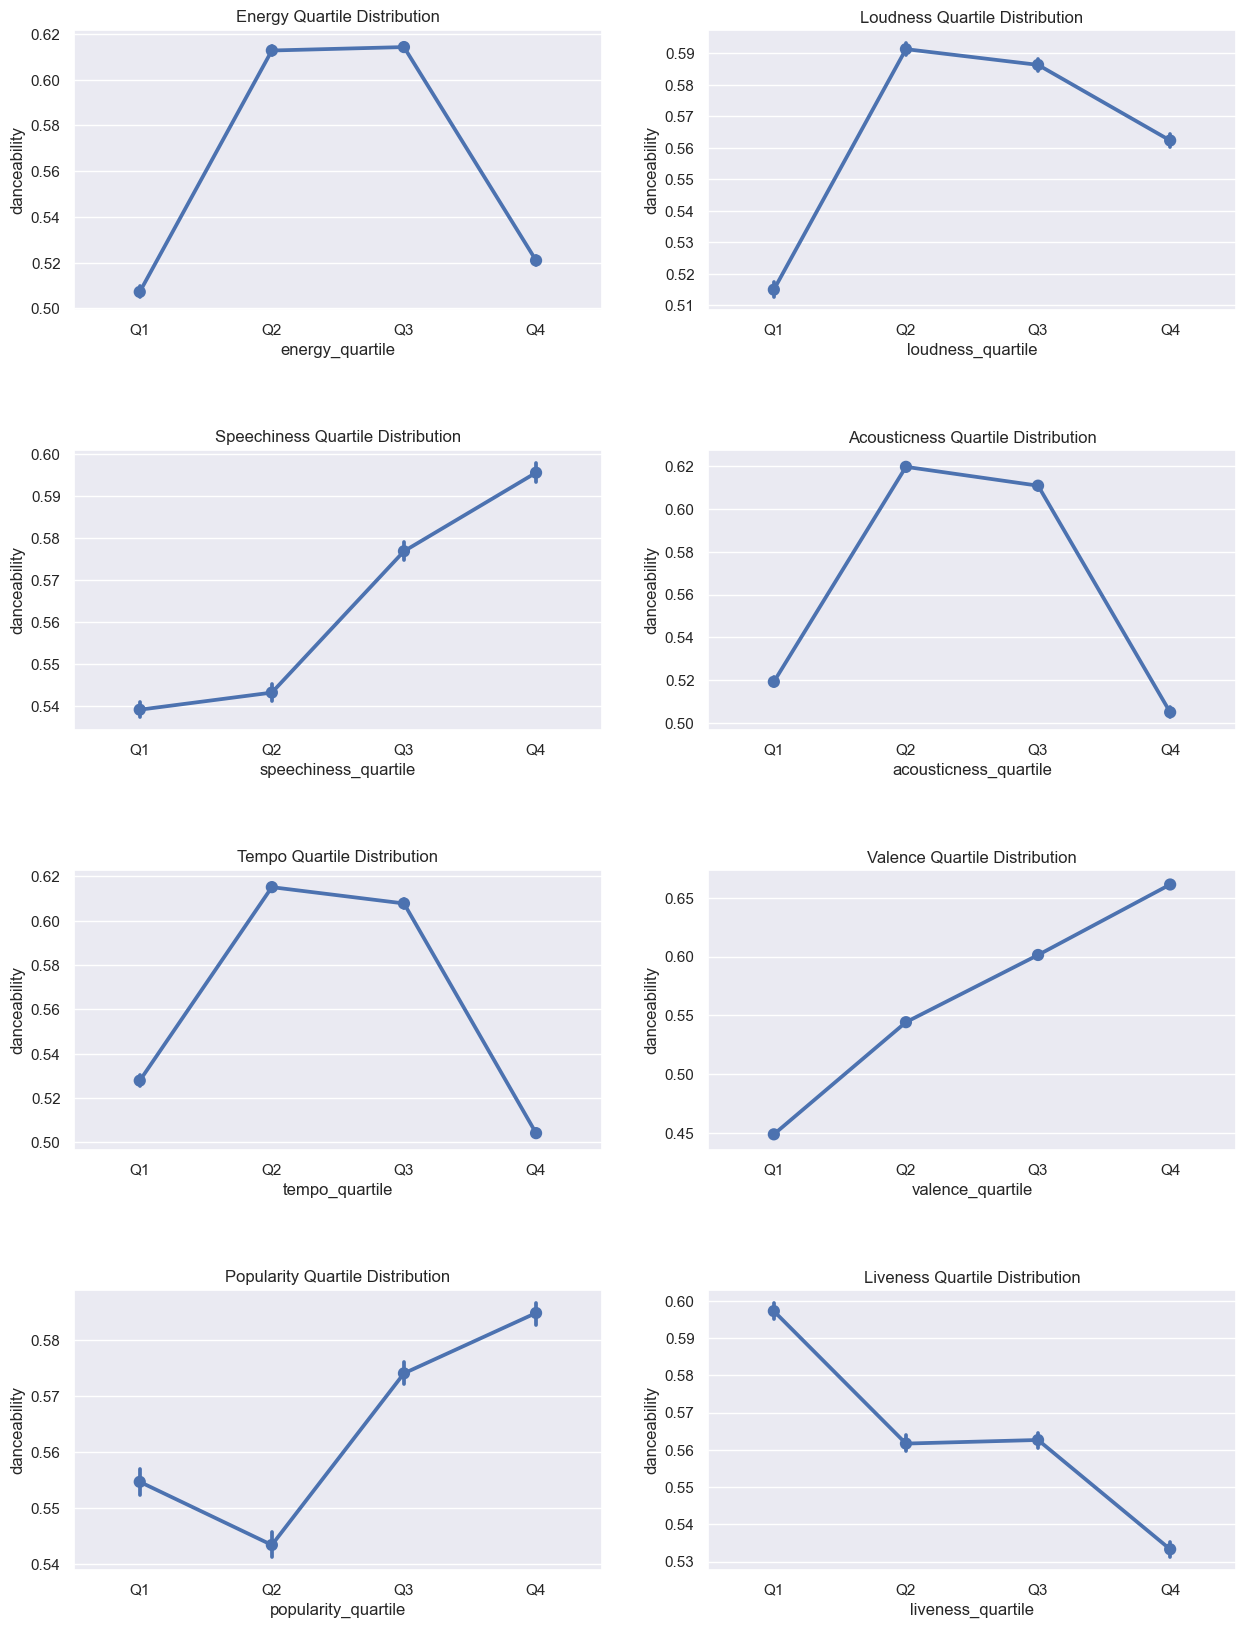

In [16]:
# Create a copy of the Spotify dataset
spotify_copy = spotify.copy()

# Convert selected attributes to quartiles
attributes_to_convert = ['energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'valence', 'popularity', 'liveness']

# Create quartile columns for each attribute
for attribute in attributes_to_convert:
    spotify_copy[f'{attribute}_quartile'] = pd.qcut(spotify_copy[attribute], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a bar plot for each attribute quartile
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, attribute in enumerate(attributes_to_convert):
    sns.pointplot(data=spotify_copy, x=f'{attribute}_quartile', y='danceability', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{attribute[0].upper()+attribute[1:]} Quartile Distribution')

plt.subplots_adjust(hspace=0.5)    
plt.show()

These point plots offer a valuable visual representation of how different musical attributes impact danceability. This comprehensive understanding will be instrumental in developing a predictive model that accurately anticipates the danceability of tracks.

# Enhancing Genre Analysis with Clustering

In our pursuit of understanding the intricate relationship between music genres and danceability, we recognized the need for a more refined approach. Initially, we attempted a basic analysis of danceability across **_114 unique music genres_**, but creating a barplot was quite overwhelming.

In [17]:
spotify.groupby('track_genre')['danceability'].agg(['mean', 'median', ('mode',lambda x: x.mode().iloc[0])])

,mean,median,mode
track_genre,,,
acoustic,0.550380,0.5580,0.582
afrobeat,0.669148,0.6890,0.677
alt-rock,0.538030,0.5480,0.557
alternative,0.562526,0.5580,0.487
ambient,0.371284,0.3700,0.324
...,...,...,...
techno,0.685112,0.7030,0.800
trance,0.574771,0.5820,0.518
trip-hop,0.639358,0.6495,0.641


To overcome this challenge, we decided to employ a more sophisticated method. We harnessed the power of _Natural Language Processing (NLP)_ to extract and analyze the definitions associated with each of the 114 music genres. This meticulous process enabled us to create a foundation for a more profound exploration of genre relationships.

To harness the full potential of these genres and derive meaningful insights, we embarked on the task of defining each genre. Our approach involved the utilization of a Language Model (LLM), a tool renowned for its ability to generate succinct and contextually relevant definitions for diverse genres.

**_Why Use an LLM?_**

We chose to leverage an LLM for several reasons:
- **Consistency**: Using an LLM ensured that the genre definitions shared a consistent structure and length, allowing for easier comparison and clustering.
- **Reduced Vocabulary Diversity**: By constraining the vocabulary used in the definitions, we aimed to achieve a level of uniformity in the language used to describe different genres.

In [72]:
#Once we had generated these genre definitions, we saved them in a structured format. We created a CSV file named `genre_dictionary.csv` and stored it in the 'files' folder.
genre_dictionary = pd.read_csv('files/genre_dictionary.csv')
genre_dictionary

,genre,definition
0,Acoustic,Music produced primarily using acoustic instru...
1,Afrobeat,A genre blending African rhythms and Western j...
2,Alt-Rock,"Alternative rock, characterized by a non-mains..."
3,Alternative,A broad category of non-mainstream music with ...
4,Ambient,Music often characterized by soothing and atmo...
...,...,...
109,Techno,Electronic dance music style with repetitive b...
110,Trance,Electronic music genre known for its hypnotic ...
111,Trip-Hop,Electronic music genre with downtempo beats an...
112,Turkish,"Music originating from Turkey, reflecting cult..."


By infusing the genre definitions with the richness of _Doc2Vec embeddings_ and the linguistic context provided by spaCy's open-source word embedding model, we were equipped with a powerful tool for clustering the genres based on their definitions. This approach not only enabled us to unveil cohesive genre groups but also emphasized our dedication to incorporating accessible and state-of-the-art resources in our analytical process.

In [71]:
spacy.cli.download("en_core_web_md")
nlp_model = spacy.load("en_core_web_md")
nlp_model

def lemmatizer(text):
    # Convert to lowercase
    lower_case = text.lower()

    # Lemmatization and Remove Stop Words
    tokens = [token.lemma_ for token in nlp_model(lower_case) if not token.is_stop]

    # Sentence Formation
    sentence = " ".join(tokens)
    return sentence

def doc2vec(text):
    # Lemmatization
    text = lemmatizer(text)

    # Initialize a vector with zeros
    vector = np.zeros(len(nlp_model('').vector))
    
    # Tokenize the lemmatized text
    tokens = nlp_model(text)
    len_of_text = len(tokens)

    if len_of_text > 0:
        # Calculate the weighted vector
        for token in tokens:            
            vector = vector + token.vector
        vector = vector / len_of_text
    return vector


def map_genre_to_doc2vec(df):
    # Extract the genre definitions from the DataFrame
    definition = list(df['definition'])
    
    # Get the dimensions for the resulting Doc2Vec vectors
    rows, cols = len(definition), len(nlp_model('').vector)
    
    # Initialize an array to store the Doc2Vec vectors
    doc2vec_genre = np.zeros(rows*cols).reshape(rows, cols)

    # Calculate the Doc2Vec vector for each genre definition
    for i, text in enumerate(definition):
        vector = doc2vec(text)
        doc2vec_genre[i] = vector
    return doc2vec_genre

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 43.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [73]:
genre_vector = map_genre_to_doc2vec(genre_dictionary)
print("doc2vec representation of genre#1: ", genre_vector[0][0:5])
print("doc2vec representation of genre#2: ", genre_vector[1][0:5])
print("doc2vec representation of genre#3: ", genre_vector[2][0:5])
print("doc2vec representation of genre#4: ", genre_vector[3][0:5])
print(genre_vector.shape)

doc2vec representation of genre#1:  [-2.71545241 -1.35414001 -1.28834057 -0.35858012  2.50714705]
doc2vec representation of genre#2:  [-0.94569867 -0.89432041  0.11685249 -1.32520501  2.72854838]
doc2vec representation of genre#3:  [-2.93170039 -0.61801003  0.00729301  0.66736898  4.06898808]
doc2vec representation of genre#4:  [-2.83153338 -0.257912   -0.58647201  0.26961697  4.73906107]
(114, 300)


In our endeavor to cluster the 114 music genres based on their definitions using NLP techniques, an essential step was to determine the optimal number of clusters. To achieve this, we leveraged the **Elbow Method**, a widely recognized technique in clustering analysis. The essence of the Elbow Method lies in identifying a point in the graph where there is a sudden change in the loss or distortion function. This point is often referred to as the 'elbow' of the graph.

Text(0.5, 1.0, 'Elbow curve')

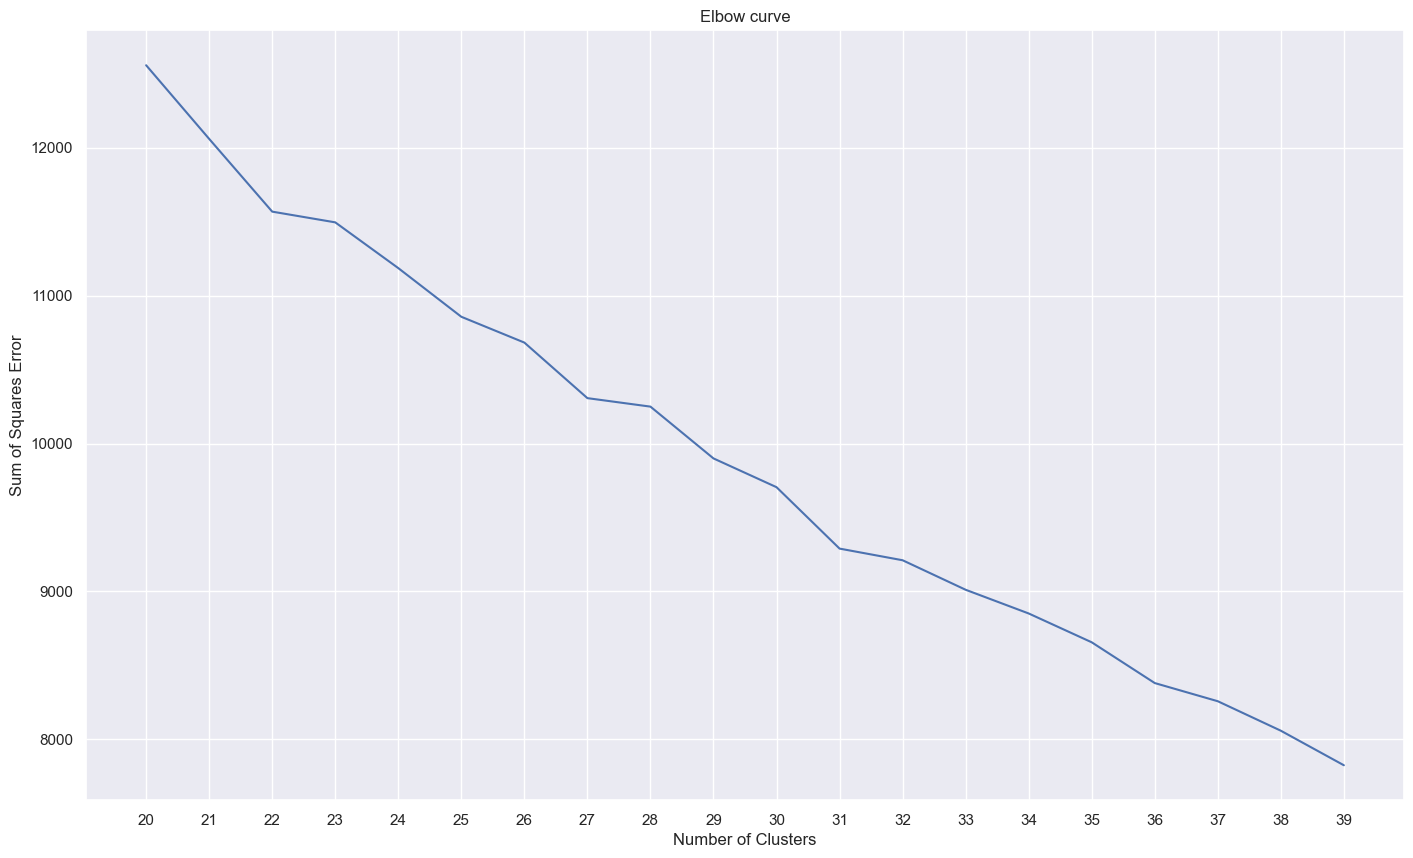

In [74]:
# Initialize empty lists to store sum of squares and cluster values
sum_of_squares = []
clusters = []

# Define a range of cluster values to test (from 20 to 39)
iteration = range(20,40)
clusters.extend(iteration)

# Iterate through different cluster values
for k in iteration:
    # Create a KMeans model with specified parameters
    model = KMeans(
        n_clusters=k,             # Number of clusters
        init='k-means++',         # Initialization method
        n_init=10,                # Number of re-run with different initializations
        max_iter=100,             # Maximum number of iterations for each run
        tol=1e-3,                 # Tolerance to declare convergence
        random_state=k*2,         # Random seed for reproducibility
    )

    # Fit the KMeans model to the genre vectors
    model.fit(genre_vector)
    # Append the sum of squares error to the list
    sum_of_squares.append(model.inertia_)

# Plotting elbow curve
sns.set(style='darkgrid')
fig = plt.figure(figsize=(17, 10))
plt.plot(clusters, sum_of_squares)
plt.grid(True)
plt.xticks(np.arange(min(clusters), max(clusters) + 1, 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Error')
plt.title('Elbow curve')

After careful analysis, we found that this sudden change occurred precisely at **22 clusters**. This number stood out as the optimal choice for grouping the 114 music genres based on their definitions. The decision to select 22 clusters was deliberate and strategic. It allowed us to strike the right balance between granularity and coherence, ensuring that each cluster captured a meaningful set of genres while avoiding excessive fragmentation.

In [75]:
model = KMeans(
    n_clusters=22, 
    init='k-means++',
    n_init=10, 
    max_iter=100,
    tol=1e-3,
    random_state=78, 
    )
model.fit(genre_vector)

genre_dictionary['cluster'] = model.labels_
genre_dictionary = genre_dictionary[['genre','cluster','definition']]
genre_dictionary

,genre,cluster,definition
0,Acoustic,9,Music produced primarily using acoustic instru...
1,Afrobeat,6,A genre blending African rhythms and Western j...
2,Alt-Rock,16,"Alternative rock, characterized by a non-mains..."
3,Alternative,16,A broad category of non-mainstream music with ...
4,Ambient,9,Music often characterized by soothing and atmo...
...,...,...,...
109,Techno,17,Electronic dance music style with repetitive b...
110,Trance,2,Electronic music genre known for its hypnotic ...
111,Trip-Hop,2,Electronic music genre with downtempo beats an...
112,Turkish,1,"Music originating from Turkey, reflecting cult..."


These clusters provide a structured framework that enhances our comprehension of the intricate relationships between genres. The benefits of this genre clustering are profound. It not only simplifies the analysis but also opens doors to more insightful and effective subsequent analyses. With these cohesive genre clusters in hand, we are better equipped to curate a dance-themed playlist that is not only harmonious but also diverse, catering to a wide spectrum of musical tastes and preferences at our upcoming summer party celebration.

In [76]:
# Generate the dictionary
result_dict = genre_dictionary.groupby('cluster')['genre'].apply(list).to_dict()

# Convert the dictionary to a DataFrame
genre_cluster = pd.DataFrame(result_dict.items(), columns=['Cluster', 'Genres'])

# Display the DataFrame
genre_cluster

,Cluster,Genres
0,0,"[Honky-Tonk, Reggaeton]"
1,1,"[Brazil, British, Classical, Folk, French, Ger..."
2,2,"[Bluegrass, Blues, Breakbeat, Drum-and-Bass, D..."
3,3,"[Anime, Indie, Opera, Piano]"
4,4,"[Club, Dancehall, Disco, Forro, Groove, Guitar..."
5,5,"[Black-Metal, Death-Metal, Grindcore, Metal]"
6,6,"[Afrobeat, Comedy, Detroit-Techno, Disney, Hap..."
7,7,"[Cantopop, Mandopop]"
8,8,"[Children, Kids, Sleep, Study]"
9,9,"[Acoustic, Ambient, Dub, EDM, Electro, Electro..."


In [77]:
# Convert genre names to lowercase for consistent mapping
genre_dictionary['genre'] = genre_dictionary['genre'].apply(str.lower)

# Create a mapping dictionary to map lowercase genre names to cluster labels as integers
# This dictionary associates each genre with its corresponding cluster label
mapping_dict = genre_dictionary.groupby('genre')['cluster'].apply(int).to_dict()

# Map the cluster labels to the 'track_genre' column in the Spotify dataset
# This adds a new column 'track_genre_cluster' with cluster labels for each track genre
spotify['track_genre_cluster'] = spotify['track_genre'].map(lambda x: mapping_dict[x])

spotify.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,9
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,9
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,9
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,9
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,9


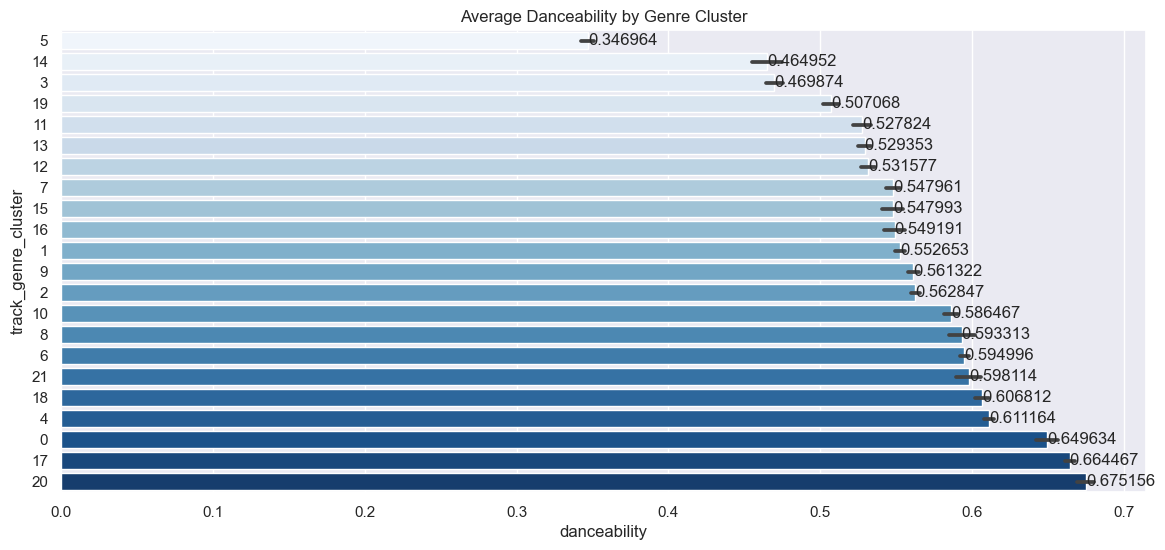

In [81]:
plt.figure(figsize=(14,6))
order = spotify.groupby('track_genre_cluster')['danceability'].mean().sort_values().index
plot = sns.barplot(data=spotify, y='track_genre_cluster', x='danceability', orient='h', palette='Blues', order=order)
plot.set_title('Average Danceability by Genre Cluster')
plot.bar_label(plot.containers[0])
plt.show()

The resulting barplot provides a visual glimpse into the danceability levels associated with each cluster. Notably, several clusters stood out for their impressive danceability scores. `Cluster 18`, boasting an average danceability score of **0.606**, emerged as a vibrant choice, offering genres that encourage dance enthusiasts to hit the floor. Close behind, `Cluster 4`, with an average score of **0.611**, and `Cluster 0`, reaching **0.649**, both promise engaging and rhythm-driven musical experiences. `Cluster 17`, with an average danceability score of **0.664**, and `Cluster 20`, topping the chart at **0.675**, further solidify the notion that genres within these clusters are ideal candidates for our dance-themed playlist. These insights guide us in selecting the most dance-friendly genres, ensuring our playlist sets the perfect mood for an energetic and unforgettable summer party celebration.

In [ ]:
# Saving Processed Data
if PROCESSED_DATA_SAVE:
    spotify.to_csv("files/processed_spotify.csv",index=False)

# Predictive Modeling for Danceability

With a profound understanding of our music genres, their attributes, and danceability patterns, the next exciting phase of our journey involves predictive modeling. Our goal is to harness the insights gleaned from extensive data exploration and genre clustering to create a robust predictive model for danceability.

## Handling Non-related & Bias Attributes

In our commitment to constructing an accurate and impartial AI model for predicting danceability, we have taken a deliberate and mindful step. Recognizing the potential for bias to influence predictive models, particularly when artist-related data is included, we have made a conscious choice to exclude specific data attributes from our model's training dataset. 

These exclusions encompass `track names`, `album information`, and `artist names`. The central objective behind this exclusion is to shield our AI model from potential biases that could arise during training. Bias in AI frequently emerges from the training data itself, and including artist information could inadvertently lead to recommendations that disproportionately favor well-known artists. 

By concentrating solely on the intrinsic characteristics of songs, such as their sound, tempo, rhythm, and other audio features, we aim to create recommendations that are firmly rooted in the qualities of the music itself, ensuring that our model remains fair, impartial, and open to both established and emerging artists who produce similar styles of music. This approach underscores our commitment to curating a dance-themed playlist that honors the essence of the music itself, transcending external influences.

## Standardization for Modeling

A crucial aspect of our data preparation process involved standardization. Specifically, we focused on standardizing key numeric attributes essential for our predictive modeling endeavor. These attributes encompassed critical factors such as `loudness`, `duration_ms`, `energy`, `speechiness`, `acousticness`, and `instrumentalness`. To achieve this, we employed the _StandardScaler_, a standardization technique that transforms these attributes to a common scale, ensuring they contribute equally to our modeling process.

In [86]:
def applyStandardScaler(data, attributes):
    for attr in attributes:
        data[attr+'_scaled'] = StandardScaler().fit_transform(data[[attr]])
        
attributes = ['loudness', 'duration_ms', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']  
applyStandardScaler(data=spotify, attributes=attributes)

## Categorical Data Transformation with One-Hot Encoding

As part of our comprehensive data preprocessing, we employed one-hot encoding to effectively handle categorical data within our dataset. Specifically, we applied this technique to two columns, namely `key` and `track_genre_cluster`.

During our analysis, we conducted a thorough assessment of the `key` feature to gauge its impact on predicting danceability. However, our findings revealed that this particular attribute did not exert a significant influence on accurately predicting danceability scores. Consequently, we made the informed decision to remove the 'key' feature from our dataset. This streamlined our data, allowing us to focus exclusively on attributes that demonstrated more substantial relevance to the prediction of danceability.

In stark contrast, our analysis highlighted the meaningful impact of the `track_genre_cluster` feature on the prediction of danceability. Given its relevance and ability to enhance our predictive model's accuracy, we retained this attribute in our dataset. 

In [87]:
one_hot_genre = pd.get_dummies(spotify['track_genre_cluster'], prefix='g_cluster')
one_hot_genre.head()

,g_cluster_0,g_cluster_1,g_cluster_2,g_cluster_3,g_cluster_4,g_cluster_5,g_cluster_6,g_cluster_7,g_cluster_8,g_cluster_9,g_cluster_10,g_cluster_11,g_cluster_12,g_cluster_13,g_cluster_14,g_cluster_15,g_cluster_16,g_cluster_17,g_cluster_18,g_cluster_19,g_cluster_20,g_cluster_21
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection for Model Training

In the preparation of our predictive model for danceability, a critical step involved the selection of features that would serve as inputs for the model, while danceability itself was designated as the target label for prediction. The features identified for model training encompass a comprehensive array of attributes:

In [92]:
attr = ['popularity', 'explicit', 'mode'] + ['duration_ms_scaled', 'energy_scaled', 'loudness_scaled',
        'speechiness_scaled','acousticness_scaled', 'instrumentalness_scaled', 'liveness_scaled',
       'valence_scaled', 'tempo_scaled', 'time_signature_scaled']

y = spotify['danceability'] #label

#features
x1 = spotify[attr] 
x1[one_hot_genre.columns] = one_hot_genre

x1.columns

Index(['popularity', 'explicit', 'mode', 'duration_ms_scaled', 'energy_scaled',
       'loudness_scaled', 'speechiness_scaled', 'acousticness_scaled',
       'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled',
       'tempo_scaled', 'time_signature_scaled', 'g_cluster_0', 'g_cluster_1',
       'g_cluster_2', 'g_cluster_3', 'g_cluster_4', 'g_cluster_5',
       'g_cluster_6', 'g_cluster_7', 'g_cluster_8', 'g_cluster_9',
       'g_cluster_10', 'g_cluster_11', 'g_cluster_12', 'g_cluster_13',
       'g_cluster_14', 'g_cluster_15', 'g_cluster_16', 'g_cluster_17',
       'g_cluster_18', 'g_cluster_19', 'g_cluster_20', 'g_cluster_21'],
      dtype='object')

By utilizing this extensive set of features, we are poised to create a model that not only understands the inherent characteristics of the music but also interprets how they collectively influence danceability. This comprehensive approach aligns with our objective of developing a robust and accurate AI model capable of generating precise predictions, ultimately enhancing the quality of the dance-themed playlist for our forthcoming summer party celebration.

## Hyperparameter Tuning for Model Optimization

In our quest to fine-tune and optimize our predictive model for danceability, we undertook a meticulous process of hyperparameter tuning. The objective was to identify the ideal combination of hyperparameters that would maximize the model's performance and predictive accuracy.

In [ ]:
# Define the desired percentage for cross-validation
percent = 30
# Calculate the number of cross-validation (CV) folds based on the percentage
cv_30percent = int(x1.shape[0]//(x1.shape[0]*percent/100))

if ML_HYPERPARAMETER_TUNING:
    # Define the hyperparameters to tune
    param_grid = {
        'n_estimators': [400],
        'max_depth': [None],
        'min_samples_split': [2,4],
        'min_samples_leaf': [4],
        'n_jobs': [-1]
    }

    # Create the random forest regressor
    rf = RandomForestRegressor()

    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_30percent, verbose=1)
    grid_search.fit(x1, y)

    # Get the best hyperparameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best hyperparameters and the best score
    best_params, best_score

({'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 400,
  'n_jobs': -1},
 0.6237475896626198)

After rigorous experimentation and evaluation, our hyperparameter tuning efforts culminated in a set of optimized hyperparameters:

**_max_depth_:** None

**_min_samples_leaf_:** 4

**_min_samples_split_:** 2

**_n_estimators_:** 400

**_n_jobs_:** -1

This configuration represents the culmination of our iterative tuning process, meticulously chosen to strike a balance between model complexity and predictive precision. The resulting model, with these optimized hyperparameters, exhibited an impressive performance metric _**Mean Absolute Error (MAE)**_ of **0.6237**.

These results signify a notable achievement in the pursuit of an AI model that can accurately predict danceability, providing invaluable insights for our playlist curation.

## Model Training and Evaluation

After meticulous experimentation and evaluation, a clear and compelling pattern emerged that the Random Forest Regressor consistently outperformed the Decision Tree Regressor in terms of predictive accuracy and robustness The Random Forest Regressor was selected as the exclusive model for our final analysis and predictive tasks.

Following the process of hyperparameter tuning, we proceeded to train our predictive model for danceability on the optimal parameters. This rigorous training process resulted in a model that demonstrates remarkable predictive capabilities, as evidenced by the following evaluation metrics:

In [42]:
if ML_TRAINING:

    best_params = {
        'max_depth': None,             # Maximum depth of each tree in the forest
        'min_samples_leaf': 4,         # Minimum no of samples required to be at a leaf node
        'min_samples_split': 2,        # Minimum no of samples required to split an internal node
        'n_estimators': 400,           # Number of trees in the random forest
        'random_state': 128,           # Seed for random number generation 
        'n_jobs': -1                   # Number of CPU cores to use for parallel computation
    }

    rf1 = RandomForestRegressor(    
        max_depth=best_params['max_depth'],
        n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=best_params['random_state'],
        n_jobs=-1
    )

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

    # Fit the decision tree regressor on the training data
    rf1.fit(x_train, y_train)

    # Predict on the testing data
    y_pred = rf1.predict(x_test)

    # Calculate the mean squared error and root mean squared error
    mse = skm.mean_squared_error(y_test, y_pred)
    rmse = skm.mean_squared_error(y_test, y_pred, squared=False)

    # Calculate the mean absolute error
    mae = skm.mean_absolute_error(y_test, y_pred)

    # Calculate the max error
    mxe = skm.max_error(y_test, y_pred)

    r2 = skm.r2_score(y_test, y_pred)

    rmse, mse, mae, mxe, r2

| Error & Score     | Value                  |
|-------------------|------------------------|
| Root Mean Square  | 0.09457460304385866    |
| Mean Square       | 0.00894435554090344    |
| Mean Absolute     | 0.07140843682128345    |
| Max  Error        | 0.4800830022823025     |
| R2   Score        | 0.7035212083361053     |

These metrics collectively underscore the model's ability to make accurate predictions of danceability, reflecting its impressive performance. The RMSE, MSE, and MAE values demonstrate the model's precision in estimating danceability scores, with the RMSE highlighting the model's ability to maintain a low level of prediction error. The Max Error provides an upper bound on prediction errors, revealing that the model rarely deviates significantly from the actual danceability scores. Finally, the R2 Score showcases the model's capacity to explain a substantial portion of the variance in danceability, indicating a strong correlation between predicted and actual values.

## Feature Importance Analysis

In our relentless pursuit of model transparency and interpretability, we conducted a comprehensive analysis of feature importance following the training of our Random Forest Regressor model. This analysis aimed to discern which attributes exerted the most significant influence on the prediction of danceability, shedding light on the factors that play a pivotal role in shaping the musical essence of our curated playlist.

In [43]:
if FEATURE_IMPORANCE:
    # Get the feature importances from the decision tree model
    feature_importances = rf1.feature_importances_

    # Get the names of the features
    feature_names = x1.columns

    # Sort the feature importances and feature names in descending order
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Create a horizontal bar graph of the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
    plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

![image_2023-09-15_001759136](screenshots/feature_importance.png)

These importance scores serve as a valuable guide, revealing the extent to which each attribute contributes to our model's predictions. Notably, `valence_scaled` emerges as the most influential attribute, underscoring its role in shaping the danceability of a track. `Tempo_scaled` also plays a substantial role, emphasizing its impact on the overall danceability prediction.

As we delved into the feature importance analysis, it became evident that the genre clusters had a significant influence on danceability predictions. While individual genres bring their unique attributes to the table, the clusters offered a more holistic perspective by encapsulating shared characteristics and patterns among multiple genres within each cluster.

For instance, `genre_cluster_5`, `genre_cluster_17`, and `genre_cluster_8`, played a pivotal role in shaping our understanding of feature importance. This holistic approach to feature importance, taking into account the influence of genre clusters, empowered us to make more informed decisions in curating our dance-themed playlist.

# Curating the Playlist

## Clusters of Significance and Rejection

Our journey to curate the perfect dance-themed playlist was not solely based on feature importance; it also took into account the essence and suitability of musical genres. To achieve this balance, we meticulously examined the clusters that emerged from our analysis, carefully selecting those that aligned with our goal of creating an electrifying atmosphere for our summer party celebration.

**Selected Clusters**
- Clusters: **[2, 4, 6, 9, 12, 13, 17]**
- These clusters have demonstrated significant feature importance in predicting danceability, as determined by the Random Forest Regressor model.

**Rejected Clusters**

While certain clusters exhibited notable feature importance, they were excluded from our final selection due to genre considerations:

- Rejected Cluster 8
    - Genres: _Children_, _Kids_, _Sleep_, _Study_
    - Despite their high feature importance, these clusters were deemed unsuitable for a party atmosphere and were therefore removed.

- Rejected Cluster 3
    - Genres: _Anime_, _Indie_, _Opera_, _Piano_
    - Although they had a standard impact on danceability, these clusters were also removed due to their unconventional genres.

- Rejected Cluster 1
    - Genres: _Brazil_, _British_, _Classical_, _Folk_, _French_, _German_, _Indian, Iranian, Latin, Latino, Malay, Spanish, Swedish, Turkish, World-Music_
    - This cluster exhibited a low effect on danceability and lacked genres suitable for a party, resulting in its removal.

- Rejected Cluster 5
    - Genres: _Black-metal, Death-metal, Grindcore, Metal_
    - This cluster exhibited a significant influence on predicting danceability. However, it did not demonstrate a high average danceability, as previously identified in the "Average Danceability by Genre Cluster" analysis.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# Creating Dance-themed Playlist

> Muhammad Faizan
>
> Muhammad Umar

# Executive Summary TEMPORARY MADE



**Dataset Overview:**
The analysis began with an exploration of a Spotify dataset containing music-related attributes for over 99,000 tracks. Key attributes included track popularity, duration, danceability, energy, key, loudness, and more.

___

## Technical Summary



**Data Cleaning:**
1. Null Values: A single record with missing values in the `album_name`, `artists`, and `track_name` columns was identified and subsequently removed from the dataset.

2. Column `artists` is standardized throughout the entire column by arranging artist names in ascending order for each record, facilitating the identification of duplicate records.

3. Duplicate Records: Duplicate records were identified based on the combination of `album_name`, `artists`, and `track_name`. 

4. Euclidean distance-based record deduplication: These duplicates were removed to ensure data integrity. A single record was retained for each group of duplicates, with selection based on the best representation using Euclidean distance.

**Exploratory Data Analysis:**

1. The impact of many songs in one album as 'album size' on danceability was analyzed. Although no strong correlation was found, this exploratory analysis shed light on potential patterns. 

2. Correlation Analysis: Two correlation analysis techniques were applied:
    - Linear Spearman correlation analysis, which did not reveal any significant correlations           between the attributes and danceability.
    - Non-linear Phik ($\phi$ k) correlation analysis, which revealed an intermediate-level             relationship that outperformed the linear analysis.

3. Relationships between attributes and danceability were explored using scatterplots, revealing insights into how features like `valence`, `tempo`, `acousticness`, `speechiness`, `loudness`, and `energy` influence danceability.

4. NLP-Based Genre Clustering:
- The dataset featured 114 unique music genres, each characterized by its distinctive               attributes.
- Definitions of these genres were extracted and employed in a sophisticated clustering             procedure.
- Leveraging 'Doc2Vec embeddings,' this approach organized the 114 genres into 22 distinct         and cohesive groups.
- Genre clustering enhanced our comprehension of genre relationships and provided a                 foundation for more insightful and effective subsequent analyses.


**Data Preprocessing:**

1. Non-related & Bias Attributes: To mitigate potential bias introduced by attributes `album_name` and `artists`, their exclusion ensured that the model's recommendations relied solely on the intrinsic properties of tracks, free from any influence stemming from artist or album associations.

2. Standardization: Key numeric attributes such as `loudness`, `duration_ms`, `energy`, `speechiness`, `acousticness`, and `instrumentalness` were standardized using the StandardScaler to prepare the data for modeling.

3. One-Hot Encoding: One-hot encoding was applied to the `key` and `track_genre_cluster` columns as they were categorical. 
    - However, it was observed that the `key` feature did not significantly impact the prediction       of danceability, and therefore, it was removed.
    - In contrast, the `track_genre_cluster` feature was retained, as it demonstrated some             influence on the prediction.

**Regression Analysis:**

1. Hyperparameter Tuning: In pursuit of optimizing model performance, hyperparameter tuning was conducted for both the Decision Tree Regressor and the Random Forest Regressor. It emerged that the Random Forest Regressor consistently delivered superior predictions for danceability. Consequently, the Random Forest Regressor was chosen as the exclusive model for the final analysis.

2. Feature Importance: Feature importance was assessed for both genre clusters and individual attributes. This analysis provided insights into which factors most strongly influence danceability.

**Curated Selection of Tracks For Playlist:**

**Conclusion:**
This comprehensive analysis of the Spotify dataset involved data cleaning, genre clustering, data preprocessing, exploratory data analysis, modeling, and feature importance assessment. It yielded valuable insights into music genre relationships, attribute influences on danceability, and the predictive capabilities of machine learning models.

In [28]:
PATH_SAVE = os.getcwd() + '/files'
print(PATH_SAVE)

/work/files/workspace/files


In [30]:
# ABHI ISKO MAT URANA ISKA USE HAI JAB SB HOJAE ISKO URA DENA

import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint( genre_dictionary.groupby('cluster')['genre'].apply(list).to_dict() )

{ 0: ['honky-tonk', 'reggaeton'],
  1: [ 'brazil',
       'british',
       'classical',
       'folk',
       'french',
       'german',
       'indian',
       'iranian',
       'latin',
       'latino',
       'malay',
       'spanish',
       'swedish',
       'turkish',
       'world-music'],
  2: [ 'bluegrass',
       'blues',
       'breakbeat',
       'drum-and-bass',
       'dubstep',
       'funk',
       'hard-rock',
       'heavy-metal',
       'ska',
       'trance',
       'trip-hop'],
  3: ['anime', 'indie', 'opera', 'piano'],
  4: [ 'club',
       'dancehall',
       'disco',
       'forro',
       'groove',
       'guitar',
       'j-idol',
       'samba'],
  5: ['black-metal', 'death-metal', 'grindcore', 'metal'],
  6: [ 'afrobeat',
       'comedy',
       'detroit-techno',
       'disney',
       'happy',
       'jazz',
       'mpb',
       'pagode',
       'party',
       'sertanejo'],
  7: ['cantopop', 'mandopop'],
  8: ['children', 'kids', 'sleep', 'study'],
  9: 

## Data Preprocessing

### Feature Importances

In [44]:
spotify.drop(columns=[i for i in spotify.columns], inplace=True)
del x1
del y
del spotify

import gc
gc.collect()

28244

In [45]:
genre_cluster [ genre_cluster.apply(lambda row: row.Cluster in [5,17,8,6], axis=1) ]

,Cluster,Genres
5,5,"[Black-Metal, Death-Metal, Grindcore, Metal]"
6,6,"[Afrobeat, Comedy, Detroit-Techno, Disney, Hap..."
8,8,"[Children, Kids, Sleep, Study]"
17,17,"[Chicago-House, Chill, Dance, Deep-House, Hard..."


## Switching to Processed Spotify Data to Manage RAM Usage
From this point onward, we are importing processed Spotify data instead of the original Spotify data. This approach prevents excessive RAM usage. Additionally, we will import all the required libraries once again.

In [46]:
import os
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as skm
import matplotlib.pyplot as plt 
    
sns.set_theme()

In [138]:
#Import Processed Data
spotify = pd.read_csv("files/processed_spotify.csv")
spotify.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,9
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,9
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,9
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,9
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,9


In [48]:
spotify.groupby('time_signature').agg(
    {
        'danceability':[
            'mean', 
            'median',
            ('mode',lambda x: x.mode()[0])
        ]
    }
)

danceability              
                       mean median   mode
time_signature                           
0                  0.016470  0.000  0.000
3                  0.439411  0.443  0.550
4                  0.577893  0.589  0.576
5                  0.461230  0.479  0.619

## Curated Selection of Tracks Based on Feature Importances

**Record Selection Based on Significant Track Genre Clusters**

**Selected Clusters**
- Clusters: `[2, 4, 6, 9, 12, 13, 17]`
- These clusters have demonstrated significant feature importance in predicting danceability, as determined by the Random Forest Regressor ML model.

**Rejected Clusters**

While certain clusters exhibited notable feature importance, they were excluded from our final selection due to genre considerations:

- Rejected Cluster 8
    - Genres: Children, Kids, Sleep, Study
    - Despite their high feature importance, these clusters were deemed unsuitable for a party atmosphere and were therefore removed.

- Rejected Cluster 3
    - Genres: Anime, Indie, Opera, Piano
    - Although they had a standard impact on danceability, these clusters were also removed due to their unconventional genres.

- Rejected Cluster 1
    - Genres: Brazil, British, Classical, Folk, French, German, Indian, Iranian, Latin, Latino, Malay, Spanish, Swedish, Turkish, World-Music
    - This cluster exhibited a low effect on danceability and lacked genres suitable for a party, resulting in its removal.

- Rejected Cluster 5
    - Genres: Black-metal, Death-metal, Grindcore, Metal
    - This cluster exhibited a significant influence on predicting danceability. However, it did not demonstrate a high average danceability, as previously identified in the "Average Danceability by Genre Cluster" analysis.

```js
'Cluster' : {
    
    1: ['Brazil', 'British', 'Classical', 'Folk', 'French', 'German', 
        'Indian', 'Iranian', 'Latin', 'Latino', 'Malay', 'Spanish', 
        'Swedish', 'Turkish', 'World-Music'],
    
    3: ['Anime', 'Indie', 'Opera', 'Piano'],
    
    5: ['Black-metal', 'Death-metal', 'Grindcore', 'Metal'],
    
    8: ['Children', 'Kids', 'Sleep', 'Study']
    
}
 ```

In [139]:
# Low Feature Importance
low_importance_cluster = [15, 21, 16, 0, 18, 20, 7, 11, 14, 19, 10]
# Not a good genre cluster
not_suitable_cluster = [1, 3, 8, 5]
drop_cluster = set(low_importance_cluster + not_suitable_cluster)

clusters_selection = [ i for i in range(22) if i not in drop_cluster]
clusters_selection

[2, 4, 6, 9, 12, 13, 17]

In [140]:
# Filter the DataFrame based on the condition

# Filtering Spotify data based on selected clusters
filtered_by_genre = spotify[spotify['track_genre_cluster'].isin(clusters_selection)]
filtered_by_genre

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,9
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,9
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,9
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,9
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97388,0rGllPwXKYxS07xZ0osn22,Leftfield;Quiet Village,Leftism 22,Melt - Quiet Village Mix,17,469906.0,False,0.333,0.3780,6,-16.326,1,0.0541,0.5140,0.910000,0.0828,0.0689,169.993,4,trip-hop,2
97389,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,17,215720.0,True,0.798,0.6840,2,-5.138,1,0.1680,0.0307,0.000159,0.4790,0.5570,94.936,4,trip-hop,2
97390,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,18,178586.0,False,0.590,0.1200,5,-12.451,1,0.0374,0.8990,0.000023,0.1090,0.3690,107.099,4,trip-hop,2
97391,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,17,202960.0,False,0.460,0.2920,11,-11.922,1,0.0281,0.3730,0.229000,0.1700,0.3570,158.906,3,trip-hop,2


### Selecting Data Based on Feature Importances Best Quartiles from 4 having good danceability average

In [142]:
# Define the list of sorted feature importances based on your analysis
sorted_feature_importances = ['valence', 'tempo', 'acousticness', 'loudness','speechiness', 'energy', 'duration_ms', 'liveness', 'popularity']

In [198]:
def selectDataOnFeatureQuartiles(data, feature, against_feature, select_q=2, q=4):
    
    labels = ['Q'+str(i+1) for i in range(q)]
   
    filtered_data = data.copy(deep=True)
    
    feature_quartile = feature+'_quartile'
    
    # Calculate quartiles for 'valence'
    filtered_data[feature_quartile] = pd.qcut(data[feature], q=4, labels=labels)

    # Calculate the average danceability for each quartile
    average_danceability_by_quartile = filtered_data.groupby(feature_quartile)[against_feature].mean()

    # Find the two quartiles with the highest average danceability
    selected_quartiles = average_danceability_by_quartile.nlargest(select_q).index

    # Filter the data based on the selected quartiles
    filtered_data = filtered_data[filtered_data[feature_quartile].isin(selected_quartiles)]

    # Now 'filtered_data' contains the rows with the two quartiles that have the highest average danceability
    
    return filtered_data.index

1. valence 65 2
2. tempo 62 2
3. acousticness 62 2
4. energy 62 2
5. speechiness 60 2
6. liveness 60 1
7. loudness 59 2
8. popularity 58 2




duration_ms feature ko filtertion me include nhi kra kukai sense nhi ban rha tha usko krna 2ndly jab uska quartile vs danceabilit plot kra tha na upar faizan to vo bs ak acha quartile tha uska or maza nhi tha usme to hata dia even thoug feature imporantance thi but hata dia as length of song se smjh nhi ata usse 

agr include krdia ajeb ak length kay song ajangye XD




Baqi sab islye inlcuded hai as unki feature imporance bhi hai
and unka quartile vs dance wala me best quarile pick up kre 

popularity me bus diffferent chez kri

popularity  me humne jo popularity ka filtered_by_genre data me median tha ussay bare walay sare leliya , isme quartile ka koi kam nhi tha asal me zarort nhi quartile ka dkehne ki isme

In [199]:
valence = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='valence', against_feature='danceability')

tempo = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='tempo', against_feature='danceability')

acousticness = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='acousticness', against_feature='danceability')

energy = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='energy', against_feature='danceability')

speechiness = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='speechiness', against_feature='danceability')

liveness = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='liveness', against_feature='danceability', select_q=1)

loudness = selectDataOnFeatureQuartiles(data=filtered_by_genre, feature='loudness', against_feature='danceability')

# Calculate the median (50th percentile) of the current feature for filtering
quantile = filtered_by_genre['popularity'].quantile(0.5)

# Filter the playlist to include only tracks with feature values greater than the median
popularity = filtered_by_genre[filtered_by_genre['popularity'] > quantile].index

In [184]:
from functools import reduce

# Create a list of all the index sets
index_sets = [valence, tempo, acousticness, energy, speechiness, liveness, loudness, popularity]

# Use reduce to find the intersection of all sets
intersection_indexes = reduce(lambda x, y: x.intersection(y), index_sets)

# Now 'intersection_indexes' contains the common indexes from all sets
intersection_indexes

Int64Index([  459,   608,   952,   958,  1261,  1312,  1835,  7342,  7520,
             7558,
            ...
            87311, 94790, 94814, 94959, 95180, 95832, 95956, 96829, 97016,
            97056],
           dtype='int64', length=188)

In [185]:
playlist = spotify[spotify.index.isin(intersection_indexes)]
playlist

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
459,3BztDPhRhfwdwUndTlg45h,Gabrielle Aplin,Dear Happy,So Far so Good,37,198040.0,False,0.751,0.565,5,-9.106,1,0.0513,0.0777,0.012100,0.0855,0.679,119.996,4,acoustic,9
608,12qmPGMrOCogibc7qyxT9s,Gen Hoshino,I Wanna Be Your Ghost (feat. Ghosts),I Wanna Be Your Ghost (feat. Ghosts),50,225533.0,False,0.829,0.751,11,-4.937,0,0.0645,0.0142,0.014000,0.0414,0.960,129.993,4,acoustic,9
952,1YuVO6AipAn5U1VoG1RBGN,Criolo,Ainda Há Tempo,Demorô,37,138480.0,False,0.755,0.709,1,-5.066,0,0.2890,0.0528,0.000000,0.0825,0.657,140.989,4,afrobeat,6
958,3AJ0MFDt4OSknQ5D9Jlo4l,Criolo,Nó na Orelha,Samba Sambei,37,222560.0,False,0.870,0.737,11,-8.372,1,0.1260,0.2680,0.003690,0.0504,0.952,136.070,4,afrobeat,6
1261,3VDMcm2WqOQdNpzLqlbp9B,Nero X,Yawa Dey,Yawa Dey,38,260220.0,False,0.858,0.634,9,-5.085,1,0.0498,0.4060,0.000000,0.0697,0.824,105.018,4,afrobeat,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,1form6XxaJCcp9CoU3Qxos,Hilight Tribe,Love medicine & natural trance,Free tibet,42,359533.0,False,0.487,0.861,11,-7.899,1,0.0516,0.4750,0.753000,0.0720,0.776,137.927,4,trance,2
95956,12Dov40hSJdrgS5uHGKNP3,Blank & Jones;Boney M.,Relax Edition 9,Sunny - Summer Vibe Mix,53,259934.0,False,0.824,0.693,8,-7.354,1,0.0631,0.0382,0.291000,0.0950,0.521,113.995,4,trance,2
96829,3ceihRUljV1eSM1plIjsB6,Little Dragon,Lover Chanting (Jayda G Remix),Lover Chanting - Edit,54,205464.0,True,0.865,0.762,0,-7.444,1,0.0762,0.0166,0.795000,0.0233,0.896,118.005,4,trip-hop,2
97016,2QtYCTIYO6WrHcFmcPtVYX,Coldcut;Roots Manuva,Sound Mirrors,True Skool,39,214066.0,False,0.673,0.838,2,-7.085,1,0.1710,0.0133,0.000218,0.0534,0.695,104.953,4,trip-hop,2


### Proportional Distribution Algorithm

This algorithm is designed to allocate a specific number of tracks to various music genres in a playlist, ensuring that each genre is represented in proportion to its prevalence in the dataset. The algorithm is especially useful when the desired total number of tracks in the playlist exceeds the number of unique tracks genres available.

**Proportional Distribution Example**

Imagine you have a dataset of items with associated quantities, and you want to allocate a specific number of items proportionally to each item category. Here's a step-by-step example:

**Data:**
```js
names:      ['a', 'b', 'c', 'd', 'e'],
quantities: [30, 20, 70, 10, 10]
allocation: [ ]
```

**Objective:** Allocate 10 items proportionally to categories 'a' through 'e' based on their quantities.

**Step 1 - Calculate Ratio:**
1. Calculate the total quantity in the dataset: 30 + 20 + 70 + 10 + 10 = 140.
2. Calculate the allocation ratio: 10 / 140 = 1/14.

**Step 2 - Initial Allocation:**
1. Multiply each category's quantity by the allocation ratio and round to the nearest integer:
   ```js
   - 'a': 30 * (1/14) ≈ 2.14 → Rounded up to 3.
   - 'b': 20 * (1/14) ≈ 1.43 → Rounded up to 2.
   - 'c': 70 * (1/14) ≈ 5.00 → Rounded up to 5.
   - 'd': 10 * (1/14) ≈ 0.71 → Rounded up to 1.
   - 'e': 10 * (1/14) ≈ 0.71 → Rounded up to 1.
   ```
2. Include the minimum required quantity category, which is 'e' with 1 item, and remove it from further allocation.

**Step 3 - Updated Dataset:**
```js
names:      ['a', 'b', 'c', 'd'],
quantities: [30, 20, 70, 10]
```
```js
allocation: [ ('e',1) ]
```
Repeat Steps 1 to 3 until all categories have been allocated the desired quantity. This process ensures that items are distributed proportionally while maintaining the minimum required quantity for each category.

Final allocation would look like this
```js
allocation: [ ('a',2), ('b',2), ('c',4), ('d',1), ('e',1)  ]
```

In [176]:
# This algorithm only works when playlist size is greater than unique number of tracks
def proportionalDistribution(playlist_size, playlist, attribute):
    # Set the desired total number of tracks in the playlist
    total = playlist_size
    no_unique_tracks = len(playlist[attribute].unique())

    if total > no_unique_tracks:
        # Create a Series with genre counts
        quantity = pd.Series(data=playlist[attribute].value_counts())
        data = []

        # Continue allocating tracks until the desired total is reached
        while total > 0:
            # Calculate the allocation ratio based on the remaining tracks to allocate
            ratio = total / quantity.sum()

            # Calculate the quantity of tracks to allocate to each genre
            quantity_include = (quantity * ratio).apply(math.ceil)

            # Find the genre with the minimum allocation requirement
            genre_name, genre_counts = quantity_include.idxmin(), quantity_include.min()

            # Append the genre name and allocated quantity to the data list
            data.append([genre_name, genre_counts])
            total -= genre_counts

            # Remove the selected genre from the quantity Series
            quantity = quantity.drop(genre_name)

        allocation = pd.DataFrame(data=data, columns=[attribute,'counts'])
        return allocation
    
    return False

In [191]:
playlist['track_genre'].value_counts().to_frame()

,track_genre
groove,15
dancehall,15
hip-hop,15
funk,13
disco,11
r-n-b,10
deep-house,9
electro,7
electronic,7
mpb,6


In [197]:
# After applying proportional Distribution

genre_selection = proportionalDistribution(50, playlist, 'track_genre')
print("Song Quanitity Selected on basis of each genre type selected from filtered playlist",genre_selection.counts.sum())
genre_selection

Song Quanitity Selected on basis of each genre type selected from filtered playlist 50


,track_genre,counts
0,hard-rock,1
1,trip-hop,1
2,forro,1
3,blues,1
4,edm,1
5,j-rock,1
6,garage,1
7,trance,1
8,breakbeat,1
9,ska,1


### Final Playlist

### Selecting 50 Tracks Using Proportional Distribution Based on Track Genre

In this process, we initially excluded less important and unrelated genre clusters from the dataset. Next, we filtered the data based on some crucial continuous feature attributes, retaining records where these attributes exceeded the 0.5 quantile threshold, resulting in 187 records.

Then, we applied a proportional distribution algorithm to ensure that each genre type was represented proportionally within the 187 records. This allocation process yielded the desired genre counts that summed up to 50.

Finally, we sorted the 187 records in descending order and systematically selected genres, one by one, until we assembled a playlist of 50 tracks.

In [188]:
# Sort the original playlist DataFrame by 'danceability' in descending order
sorted_playlist = playlist.sort_values(by='danceability', ascending=False)

# Create an empty DataFrame to store the selected tracks
playlist_50 = pd.DataFrame(data=[], columns=spotify.columns)

# Iterate through each row in the genre_selection DataFrame
for _, row in genre_selection.iterrows():
    
    genre = row['track_genre'] # Extract the genre name
    count = row['counts']      # Extract the desired count for this genre
    
    # Select the top 'count' tracks of the specified genre and concatenate them to playlist_50
    genre_tracks = sorted_playlist[sorted_playlist['track_genre'] == genre].head(count)
    playlist_50 = pd.concat([playlist_50, genre_tracks])

playlist_50

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
41988,7dEKwMoUZCpvUFLLuJQjju,KISS,KISS 40,I Was Made For Lovin' You - Single Mix,63,241106.0,False,0.708,0.856,9,-5.400,1,0.0537,0.0287,0.000085,0.0727,0.902,128.518,4,hard-rock,2
96829,3ceihRUljV1eSM1plIjsB6,Little Dragon,Lover Chanting (Jayda G Remix),Lover Chanting - Edit,54,205464.0,True,0.865,0.762,0,-7.444,1,0.0762,0.0166,0.795000,0.0233,0.896,118.005,4,trip-hop,2
31408,0o6lcPso94JOf4F56xsRgv,Catuaba Com Amendoim,O Tesão do Forró,Parabéns Meu Amor,37,188400.0,False,0.742,0.806,7,-8.974,1,0.0510,0.1340,0.000000,0.0945,0.883,119.697,4,forro,4
7520,2jbZNxygeXpRxRuKJeEQHn,T.K. Soul,Untouchable,Ride or Die,36,250802.0,False,0.878,0.602,1,-5.161,1,0.0871,0.2500,0.000005,0.0389,0.964,141.973,4,blues,2
26728,4BiiOzZCrXEzHRLYcYFiD5,The Chainsmokers;Winona Oak,Sick Boy,Hope,65,180120.0,False,0.773,0.699,1,-5.982,0,0.0958,0.4880,0.000004,0.0814,0.513,104.941,4,edm,9
55769,18rI489dTiiDiBSWMW0TSu,Eikichi Yazawa,永吉 (50th Anniversary Remastered),PURE GOLD - Remastered 2022,38,239960.0,False,0.677,0.717,7,-8.342,1,0.0633,0.1880,0.000585,0.0935,0.600,122.938,4,j-rock,9
33411,6mVD1SfTvlFAPVi7txFL5H,The Strokes,Angles,Machu Picchu,64,209626.0,False,0.695,0.817,1,-5.294,1,0.0659,0.0132,0.097000,0.0601,0.874,105.014,4,garage,13
95956,12Dov40hSJdrgS5uHGKNP3,Blank & Jones;Boney M.,Relax Edition 9,Sunny - Summer Vibe Mix,53,259934.0,False,0.824,0.693,8,-7.354,1,0.0631,0.0382,0.291000,0.0950,0.521,113.995,4,trance,2
9626,6WKlbp24TraMPpWhQtU1Kp,The Chemical Brothers,No Geography,Eve Of Destruction,40,280400.0,False,0.801,0.857,6,-5.775,0,0.0604,0.0760,0.004580,0.0847,0.633,125.966,4,breakbeat,2
87311,5ZG83RxgtxxTKfXQ3TmhT0,Los Fabulosos Cadillacs,Rey Azúcar,Padre Nuestro - Remasterizado 2008,37,213866.0,False,0.794,0.759,4,-5.766,0,0.2740,0.3910,0.000000,0.0809,0.940,106.093,4,ska,2


In [190]:
playlist_50['track_genre'].value_counts().to_frame()

,track_genre
groove,3
hip-hop,2
samba,2
deep-house,2
electro,2
electronic,2
mpb,2
r-n-b,2
disco,2
dance,2


In [200]:
playlist_50[['artists','track_name','track_genre','popularity','danceability']]

,artists,track_name,track_genre,popularity,danceability
41988,KISS,I Was Made For Lovin' You - Single Mix,hard-rock,63,0.708
96829,Little Dragon,Lover Chanting - Edit,trip-hop,54,0.865
31408,Catuaba Com Amendoim,Parabéns Meu Amor,forro,37,0.742
7520,T.K. Soul,Ride or Die,blues,36,0.878
26728,The Chainsmokers;Winona Oak,Hope,edm,65,0.773
55769,Eikichi Yazawa,PURE GOLD - Remastered 2022,j-rock,38,0.677
33411,The Strokes,Machu Picchu,garage,64,0.695
95956,Blank & Jones;Boney M.,Sunny - Summer Vibe Mix,trance,53,0.824
9626,The Chemical Brothers,Eve Of Destruction,breakbeat,40,0.801
87311,Los Fabulosos Cadillacs,Padre Nuestro - Remasterizado 2008,ska,37,0.794


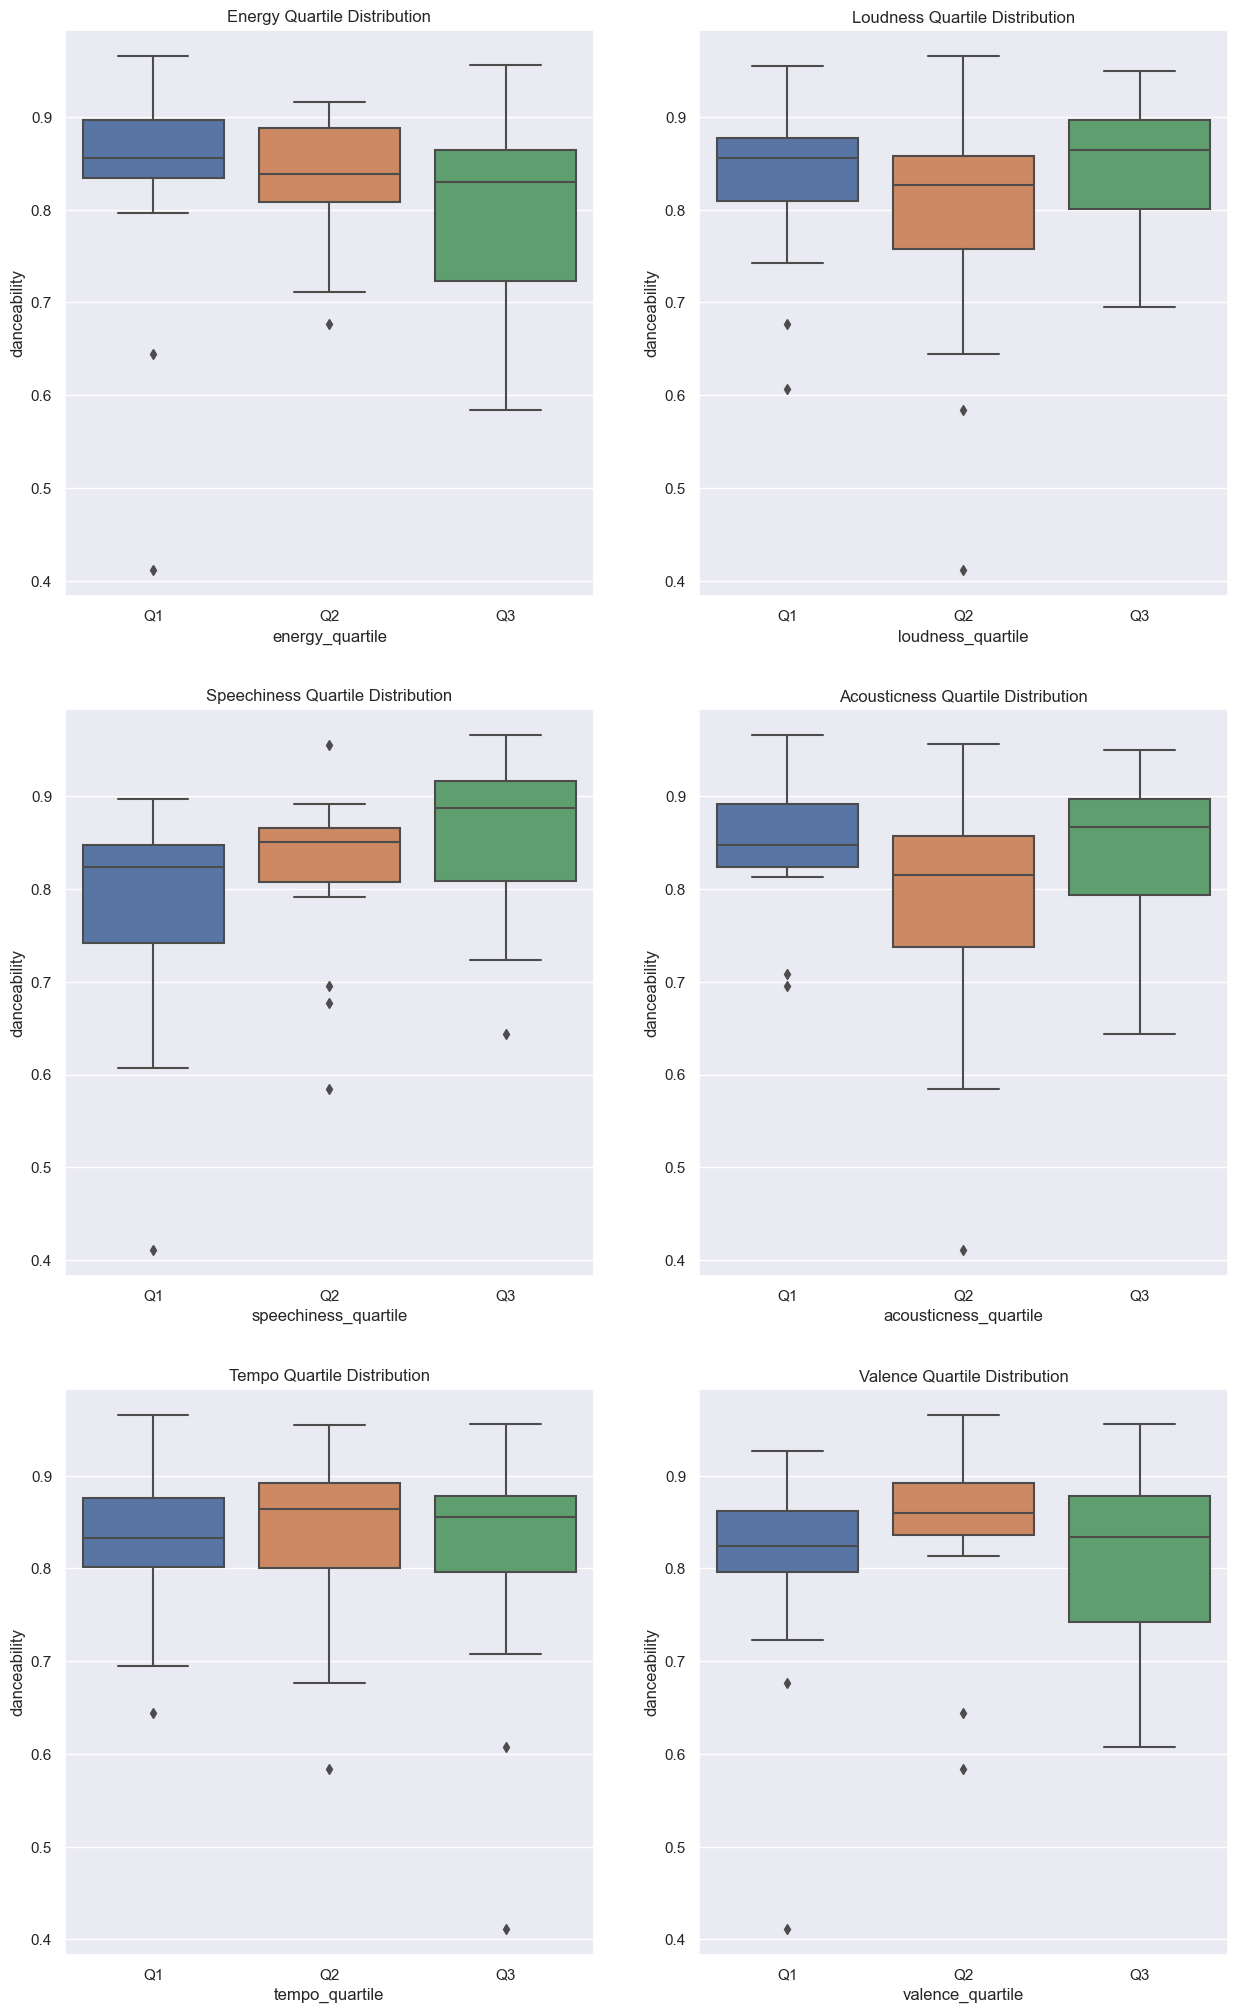

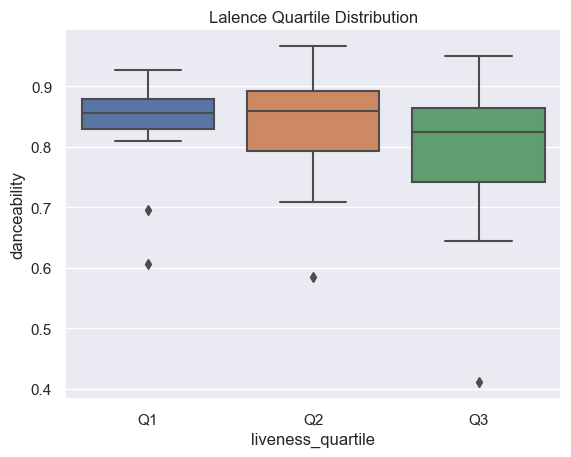

In [238]:
# Create a copy of the Spotify dataset
playlist_50_copy = playlist_50.copy()

# Convert selected attributes to quartiles
attributes_to_convert = ['energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'valence', 'liveness']
attribues_last = attributes_to_convert[-1]

# Create quartile columns for each attribute
for attribute in attributes_to_convert:
    playlist_50_copy[f'{attribute}_quartile'] = pd.qcut(playlist_50_copy[attribute], q=3, labels=['Q1','Q2','Q3'])

# Create a bar plot for each attribute quartile
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))

for i, attribute in enumerate(attributes_to_convert[:-1]):
    sns.boxplot(data=playlist_50_copy, x=f'{attribute}_quartile', y='danceability', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{attribute[0].upper()+attribute[1:]} Quartile Distribution')

plt.subplots_adjust(hspace=0.2)
plt.show()

sns.boxplot(data=playlist_50_copy, x=f'{attribues_last}_quartile', y='danceability').set_title(f'{attribues_last[0].upper()+attribute[1:]} Quartile Distribution')
plt.show()